# Predict House Prices in King County, Washington  

King County, Washington is the most populous county in Washington. It is also the 12th most populous in the United States. Washington's most populous city is Seattle.My goal is to predict the price of a house based on houses sold between May 2014 to May 2015 in King County, Washington State, USA for and create a model that home buyers, home sellers, and online property listings can use to determine the price of a home.  

## Table of Contents:
* [Data Wrangling](#DataWrangling)
* [Data Profile](#DataProfile)
* [Data Relationships](#DataRelationships)
* [Data Distribution](#DataDistribution)
* [Price vs Features](#PriceVSFeatures)

In [32]:
#imports
import pandas as pd
#import opendatasets as od
#import os
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import scale
#from sklearn import linear_model
#from sklearn.preprocessing import StandardScaler

# 1. Data Wrangling <a class="anchor" id="DataWrangling"></a>

## 1.1 Collect

The dataset I am using is <a href="https://www.kaggle.com/shivachandel/kc-house-data">here</a>. 

In [2]:
#get the data from API
#housingAPI = od.download("https://www.kaggle.com/shivachandel/kc-house-data")

Skipping, found downloaded files in "./kc-house-data" (use force=True to force download)


In [5]:
#get the data and read it 
housingData = pd.read_csv('../Data/kc_house_data.csv')

## 1.2 Clean and Organize Data

This section is cleaning and organizing the data.

In [6]:
#Check for duplicates
housingData.duplicated()

duplicate = housingData[housingData.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


In [9]:
#Check for any null values
print(housingData.isnull().values.any())

True


In [10]:
#Check how many null values
print(housingData.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [11]:
# 2 null values are in the sqft_above column > index 10 & 17
housingData[housingData['sqft_above'].isna()]

id             date     price  bedrooms  bathrooms  sqft_living  \
10  1736800520  20150403T000000  662500.0         3        2.5         3560   
17  6865200140  20140529T000000  485000.0         4        1.0         1600   

    sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
10      9796     1.0           0     0  ...      8         NaN           1700   
17      4300     1.5           0     0  ...      7         NaN              0   

    yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
10      1965             0    98007  47.6007 -122.145           2210   
17      1916             0    98103  47.6648 -122.343           1610   

    sqft_lot15  
10        8925  
17        4300  

[2 rows x 21 columns]

In [12]:
#Remove the rows where sqft_above is not NA
newHousingDF = housingData[housingData['sqft_above'].notna()]

newHousingDF.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# 2. Data Profile  <a class="anchor" id="DataProfile"></a>

In this section, I am reviewing the data to get a better understanding of it.

## 2.1

In [13]:
#Show summary of stats with transpose 
newHousingDF.describe().T

count          mean           std           min  \
id             21611.0  4.580327e+09  2.876592e+09  1.000102e+06   
price          21611.0  5.400850e+05  3.671430e+05  7.500000e+04   
bedrooms       21611.0  3.370830e+00  9.300916e-01  0.000000e+00   
bathrooms      21611.0  2.114791e+00  7.701570e-01  0.000000e+00   
sqft_living    21611.0  2.079853e+03  9.184224e+02  2.900000e+02   
sqft_lot       21611.0  1.510771e+04  4.142235e+04  5.200000e+02   
floors         21611.0  1.494332e+00  5.400034e-01  1.000000e+00   
waterfront     21611.0  7.542455e-03  8.652117e-02  0.000000e+00   
view           21611.0  2.343251e-01  7.663497e-01  0.000000e+00   
condition      21611.0  3.409421e+00  6.507548e-01  1.000000e+00   
grade          21611.0  7.656888e+00  1.175502e+00  1.000000e+00   
sqft_above     21611.0  1.788396e+03  8.281282e+02  2.900000e+02   
sqft_basement  21611.0  2.914574e+02  4.424874e+02  0.000000e+00   
yr_built       21611.0  1.971008e+03  2.937236e+01  1.900000e+03   
yr_renovated   21611.0  8.441007e+01  4.016970e+02  0.000000e+00   
zipcode        21611.0  9.807794e+04  5.350505e+01  9.800100e+04   
lat            21611.0  4.756005e+01  1.385680e-01  4.715590e+01   
long           21611.0 -1.222139e+02  1.408313e-01 -1.225190e+02   
sqft_living15  21611.0  1.986560e+03  6.854165e+02  3.990000e+02   
sqft_lot15     21611.0  1.276903e+04  2.730537e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.217250e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.426000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068850e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747095e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008350e+04  8.712000e+05

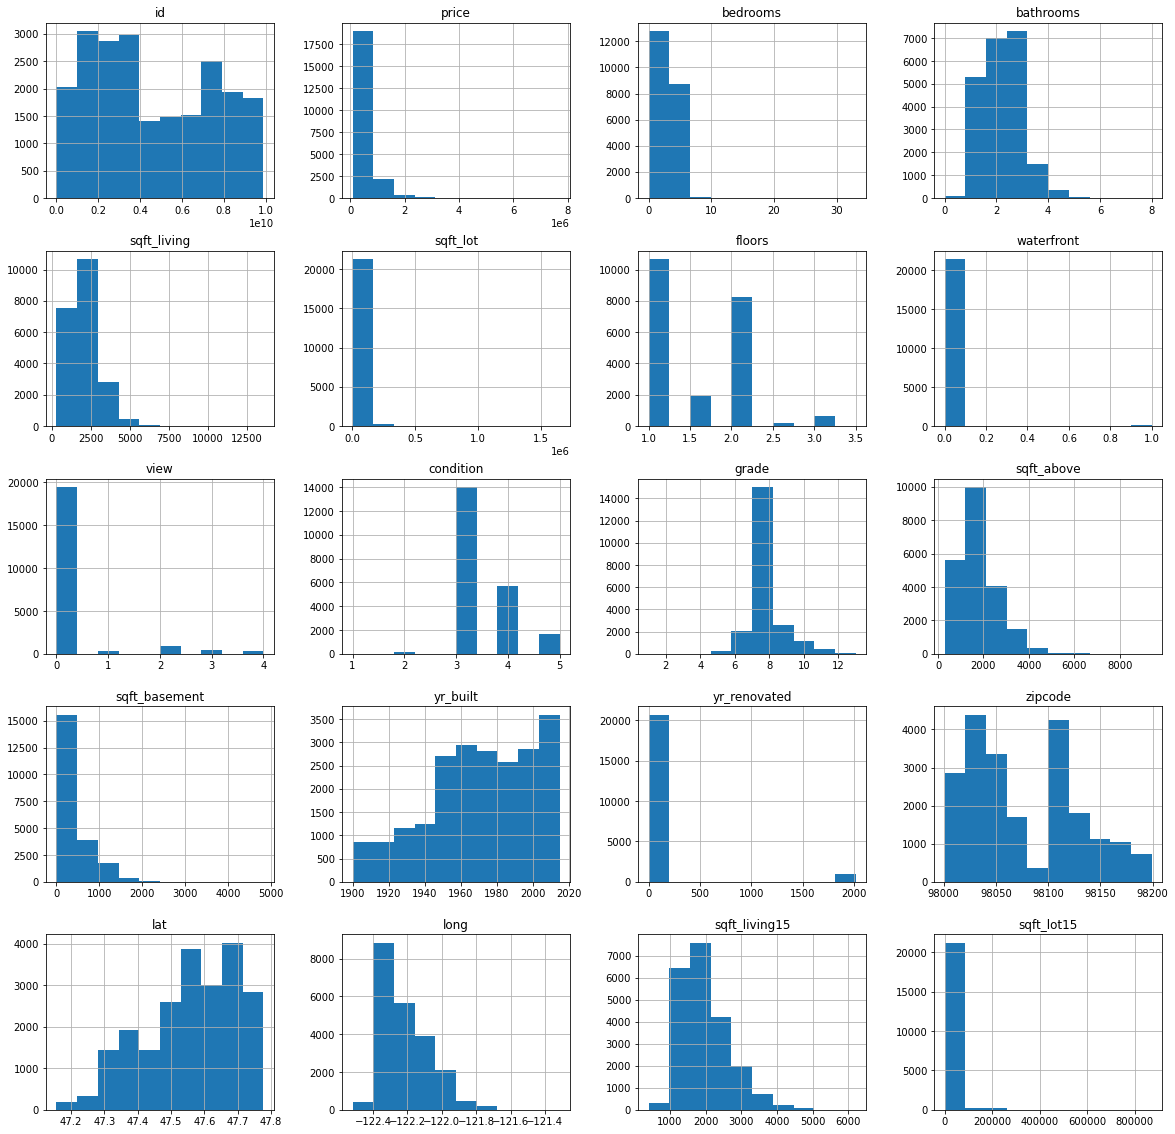

In [14]:
#create histogram for each variable in df 
histogram = newHousingDF.hist(bins=10, figsize=(20,20))

## 2.2 Plotting for categorical variables

newHousingDF does have some categorical variables: waterfront, view, condition, grade

<b>waterfront</b> - If the house has a waterfront view. Data Type: Numeric

<b>view</b> - If the house have been viewd. Data Type: Numeric

<b>condition</b> - How good the condition is ( Overall ). 1 indicates worn out property and 5 excellent. Data Type: Numeric

<b>grade</b> - The overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent. Dat Type: Numeric

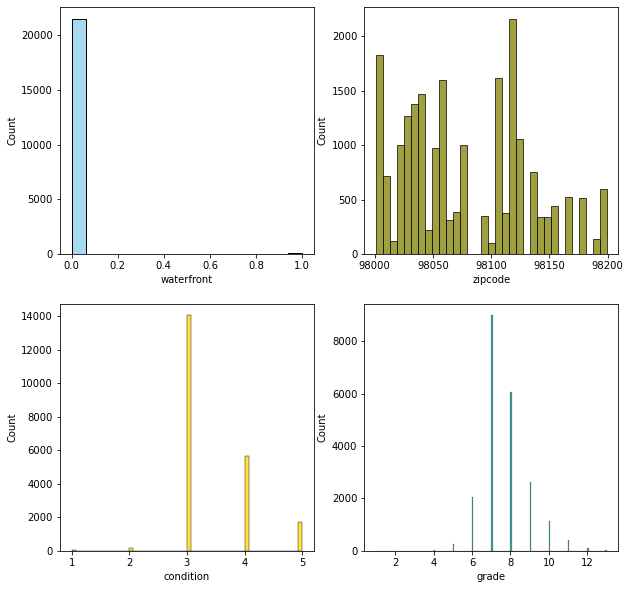

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(data=newHousingDF, x="waterfront", color="skyblue", ax=axs[0, 0])
sns.histplot(data=newHousingDF, x="zipcode", color="olive", ax=axs[0, 1])
sns.histplot(data=newHousingDF, x="condition", color="gold", ax=axs[1, 0])
sns.histplot(data=newHousingDF, x="grade", color="teal", ax=axs[1, 1])



plt.show()

## 2.3 Reviewing for Outliers and Anamolies

I am using a boxplot to determine if there are any outliers with the target variable - the price column.

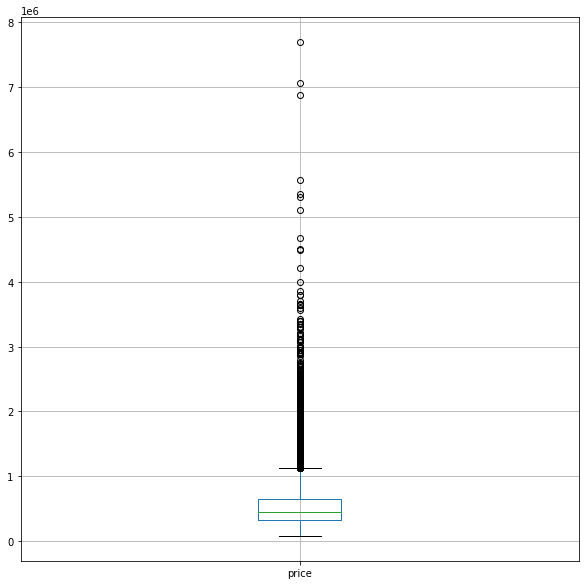

In [25]:
figure, ax = plt.subplots(figsize=(10, 10))
boxplot = newHousingDF.boxplot(column=['price'])

### Taking a closer look at the outliers

Let's take a look to see why there might be outliers

In [21]:
#Check the median of the house prices
medianHouse = newHousingDF.price.median()
medianHouse

450000.0

In [23]:
#View the houseswith the median house price 
newHousingDF[newHousingDF['price'] == medianHouse]

id             date     price  bedrooms  bathrooms  \
48     9215400105  20150428T000000  450000.0         3       1.75   
276    9189700045  20150127T000000  450000.0         3       2.00   
376    9423400140  20140609T000000  450000.0         3       1.75   
406    7821200390  20140806T000000  450000.0         3       2.00   
773    1623300160  20140506T000000  450000.0         2       2.00   
...           ...              ...       ...       ...        ...   
21020  9826701201  20150209T000000  450000.0         2       1.50   
21122  2708450020  20140912T000000  450000.0         4       2.50   
21152  9268850290  20150306T000000  450000.0         3       2.25   
21198  4140940130  20141121T000000  450000.0         3       2.75   
21456  3362401761  20150225T000000  450000.0         2       1.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
48            1250      5963     1.0           0     0  ...      7   
276           2290     16258     1.0           0     0  ...      8   
376           1640     13500     1.0           0     0  ...      7   
406           1290      1213     3.0           0     0  ...      8   
773           1100      3000     1.5           0     0  ...      7   
...            ...       ...     ...         ...   ...  ...    ...   
21020         1530      1012     2.0           0     0  ...      8   
21122         3236      9608     2.0           0     0  ...     10   
21152         1620      1057     3.0           0     0  ...      8   
21198         2240      3360     2.0           0     0  ...      8   
21456         1020      1049     3.0           0     0  ...      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
48         1250.0              0      1953             0    98115  47.6796   
276        2290.0              0      1960             0    98058  47.4672   
376        1110.0            530      1940             0    98125  47.7164   
406        1290.0              0      2001             0    98103  47.6609   
773        1100.0              0      1912          2005    98117  47.6797   
...           ...            ...       ...           ...      ...      ...   
21020      1200.0            330      2005             0    98122  47.6020   
21122      3236.0              0      2005             0    98030  47.3838   
21152      1540.0             80      2009             0    98027  47.5396   
21198      2100.0            140      2014             0    98178  47.4999   
21456      1020.0              0      2008             0    98103  47.6800   

          long  sqft_living15  sqft_lot15  
48    -122.301            970        5100  
276   -122.165           1660       10530  
376   -122.304           1770       12600  
406   -122.344           1290        3235  
773   -122.362           1390        4000  
...        ...            ...         ...  
21020 -122.306           1530        1425  
21122 -122.195           3236        9660  
21152 -122.026           1390         942  
21198 -122.232           1790        5873  
21456 -122.348           1350        1395  

[172 rows x 21 columns]

There are 172 houses with the price of $450,000.00 which contributes to the many outliers. 

# 3. Data Relationships - Explore the Data <a class="anchor" id="DataRelationships"></a> 

Before we explore the data, let's map the area to get a better visual understanding of the area. 

## 3.1 Mapping the Area

Now I am going to display the number of properties in each area in Kings County, Washington using plotly.

In [111]:
#add map of number of properties in each area
import plotly.express as px

#px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(newHousingDF, lat="lat", lon="long", color="zipcode",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                        title="The number of properties of each area in King County, Washington")
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Scatter: 'fillpattern'

Did you mean "fillcolor"?

    Valid properties:
        cliponaxis
            Determines whether or not markers and text nodes are
            clipped about the subplot axes. To show markers and
            text nodes above axis lines and tick labels, make sure
            to set `xaxis.layer` and `yaxis.layer` to *below
            traces*.
        connectgaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the provided data arrays are connected.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.scatter.ErrorX` instance
            or dict with compatible properties
        error_y
            :class:`plotly.graph_objects.scatter.ErrorY` instance
            or dict with compatible properties
        fill
            Sets the area to fill with a solid color. Defaults to
            "none" unless this trace is stacked, then it gets
            "tonexty" ("tonextx") if `orientation` is "v" ("h") Use
            with `fillcolor` if not "none". "tozerox" and "tozeroy"
            fill to x=0 and y=0 respectively. "tonextx" and
            "tonexty" fill between the endpoints of this trace and
            the endpoints of the trace before it, connecting those
            endpoints with straight lines (to make a stacked area
            graph); if there is no trace before it, they behave
            like "tozerox" and "tozeroy". "toself" connects the
            endpoints of the trace (or each segment of the trace if
            it has gaps) into a closed shape. "tonext" fills the
            space between two traces if one completely encloses the
            other (eg consecutive contour lines), and behaves like
            "toself" if there is no trace before it. "tonext"
            should not be used if one trace does not enclose the
            other. Traces in a `stackgroup` will only fill to (or
            be filled to) other traces in the same group. With
            multiple `stackgroup`s or some traces stacked and some
            not, if fill-linked traces are not already consecutive,
            the later ones will be pushed down in the drawing
            order.
        fillcolor
            Sets the fill color. Defaults to a half-transparent
            variant of the line color, marker color, or marker line
            color, whichever is available.
        groupnorm
            Only relevant when `stackgroup` is used, and only the
            first `groupnorm` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the normalization for the sum of
            this `stackgroup`. With "fraction", the value of each
            trace at each location is divided by the sum of all
            trace values at that location. "percent" is the same
            but multiplied by 100 to show percentages. If there are
            multiple subplots, or multiple `stackgroup`s on one
            subplot, each will be normalized within its own set.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.scatter.Hoverlabel`
            instance or dict with compatible properties
        hoveron
            Do the hover effects highlight individual points
            (markers or line points) or do they highlight filled
            regions? If the fill is "toself" or "tonext" and there
            are no markers or text, then the default is "fills",
            otherwise it is "points".
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.scatter.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        line
            :class:`plotly.graph_objects.scatter.Line` instance or
            dict with compatible properties
        marker
            :class:`plotly.graph_objects.scatter.Marker` instance
            or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        mode
            Determines the drawing mode for this scatter trace. If
            the provided `mode` includes "text" then the `text`
            elements appear at the coordinates. Otherwise, the
            `text` elements appear on hover. If there are less than
            20 points and the trace is not stacked then the default
            is "lines+markers". Otherwise, "lines".
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        orientation
            Only relevant when `stackgroup` is used, and only the
            first `orientation` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the stacking direction. With "v"
            ("h"), the y (x) values of subsequent traces are added.
            Also affects the default value of `fill`.
        selected
            :class:`plotly.graph_objects.scatter.Selected` instance
            or dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stackgaps
            Only relevant when `stackgroup` is used, and only the
            first `stackgaps` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Determines how we handle locations at
            which other traces in this group have data but this one
            does not. With *infer zero* we insert a zero at these
            locations. With "interpolate" we linearly interpolate
            between existing values, and extrapolate a constant
            beyond the existing values.
        stackgroup
            Set several scatter traces (on the same subplot) to the
            same stackgroup in order to add their y values (or
            their x values if `orientation` is "h"). If blank or
            omitted this trace will not be stacked. Stacking also
            turns `fill` on by default, using "tonexty" ("tonextx")
            if `orientation` is "h" ("v") and sets the default
            `mode` to "lines" irrespective of point count. You can
            only stack on a numeric (linear or log) axis. Traces in
            a `stackgroup` will only fill to (or be filled to)
            other traces in the same group. With multiple
            `stackgroup`s or some traces stacked and some not, if
            fill-linked traces are not already consecutive, the
            later ones will be pushed down in the drawing order.
        stream
            :class:`plotly.graph_objects.scatter.Stream` instance
            or dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textfont
            Sets the text font.
        textposition
            Sets the positions of the `text` elements with respects
            to the (x,y) coordinates.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.scatter.Unselected`
            instance or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        
Did you mean "fillcolor"?

Bad property path:
fillpattern
^^^^^^^^^^^

In [107]:
api_token = input("pk.eyJ1Ijoia2llcnJhZGFjaGVsbGUiLCJhIjoiY2pxY3dxcmthNGQzdTQzcjFqbTF6N21hZyJ9.nNtJF12Zxqf66JRey8CSnA")

pk.eyJ1Ijoia2llcnJhZGFjaGVsbGUiLCJhIjoiY2pxY3dxcmthNGQzdTQzcjFqbTF6N21hZyJ9.nNtJF12Zxqf66JRey8CSnAkierradachelle@yahoo.com


In [114]:
import plotly.express as px

fig = px.scatter_mapbox(newHousingDF, lat="lat", lon="long", zoom=3, mapbox_style='open-street-map')
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Scatter: 'fillpattern'

Did you mean "fillcolor"?

    Valid properties:
        cliponaxis
            Determines whether or not markers and text nodes are
            clipped about the subplot axes. To show markers and
            text nodes above axis lines and tick labels, make sure
            to set `xaxis.layer` and `yaxis.layer` to *below
            traces*.
        connectgaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the provided data arrays are connected.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.scatter.ErrorX` instance
            or dict with compatible properties
        error_y
            :class:`plotly.graph_objects.scatter.ErrorY` instance
            or dict with compatible properties
        fill
            Sets the area to fill with a solid color. Defaults to
            "none" unless this trace is stacked, then it gets
            "tonexty" ("tonextx") if `orientation` is "v" ("h") Use
            with `fillcolor` if not "none". "tozerox" and "tozeroy"
            fill to x=0 and y=0 respectively. "tonextx" and
            "tonexty" fill between the endpoints of this trace and
            the endpoints of the trace before it, connecting those
            endpoints with straight lines (to make a stacked area
            graph); if there is no trace before it, they behave
            like "tozerox" and "tozeroy". "toself" connects the
            endpoints of the trace (or each segment of the trace if
            it has gaps) into a closed shape. "tonext" fills the
            space between two traces if one completely encloses the
            other (eg consecutive contour lines), and behaves like
            "toself" if there is no trace before it. "tonext"
            should not be used if one trace does not enclose the
            other. Traces in a `stackgroup` will only fill to (or
            be filled to) other traces in the same group. With
            multiple `stackgroup`s or some traces stacked and some
            not, if fill-linked traces are not already consecutive,
            the later ones will be pushed down in the drawing
            order.
        fillcolor
            Sets the fill color. Defaults to a half-transparent
            variant of the line color, marker color, or marker line
            color, whichever is available.
        groupnorm
            Only relevant when `stackgroup` is used, and only the
            first `groupnorm` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the normalization for the sum of
            this `stackgroup`. With "fraction", the value of each
            trace at each location is divided by the sum of all
            trace values at that location. "percent" is the same
            but multiplied by 100 to show percentages. If there are
            multiple subplots, or multiple `stackgroup`s on one
            subplot, each will be normalized within its own set.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.scatter.Hoverlabel`
            instance or dict with compatible properties
        hoveron
            Do the hover effects highlight individual points
            (markers or line points) or do they highlight filled
            regions? If the fill is "toself" or "tonext" and there
            are no markers or text, then the default is "fills",
            otherwise it is "points".
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.scatter.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        line
            :class:`plotly.graph_objects.scatter.Line` instance or
            dict with compatible properties
        marker
            :class:`plotly.graph_objects.scatter.Marker` instance
            or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        mode
            Determines the drawing mode for this scatter trace. If
            the provided `mode` includes "text" then the `text`
            elements appear at the coordinates. Otherwise, the
            `text` elements appear on hover. If there are less than
            20 points and the trace is not stacked then the default
            is "lines+markers". Otherwise, "lines".
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        orientation
            Only relevant when `stackgroup` is used, and only the
            first `orientation` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the stacking direction. With "v"
            ("h"), the y (x) values of subsequent traces are added.
            Also affects the default value of `fill`.
        selected
            :class:`plotly.graph_objects.scatter.Selected` instance
            or dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stackgaps
            Only relevant when `stackgroup` is used, and only the
            first `stackgaps` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Determines how we handle locations at
            which other traces in this group have data but this one
            does not. With *infer zero* we insert a zero at these
            locations. With "interpolate" we linearly interpolate
            between existing values, and extrapolate a constant
            beyond the existing values.
        stackgroup
            Set several scatter traces (on the same subplot) to the
            same stackgroup in order to add their y values (or
            their x values if `orientation` is "h"). If blank or
            omitted this trace will not be stacked. Stacking also
            turns `fill` on by default, using "tonexty" ("tonextx")
            if `orientation` is "h" ("v") and sets the default
            `mode` to "lines" irrespective of point count. You can
            only stack on a numeric (linear or log) axis. Traces in
            a `stackgroup` will only fill to (or be filled to)
            other traces in the same group. With multiple
            `stackgroup`s or some traces stacked and some not, if
            fill-linked traces are not already consecutive, the
            later ones will be pushed down in the drawing order.
        stream
            :class:`plotly.graph_objects.scatter.Stream` instance
            or dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textfont
            Sets the text font.
        textposition
            Sets the positions of the `text` elements with respects
            to the (x,y) coordinates.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.scatter.Unselected`
            instance or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        
Did you mean "fillcolor"?

Bad property path:
fillpattern
^^^^^^^^^^^

In [50]:
import plotly.express as px
px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(newHousingDF, lat="lat", lon="long", color="zipcode",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                        title="The number of properties of each area in King County, Washington")
fig.show()

FileNotFoundError: [Errno 2] No such file or directory: '.mapbox_token'

In [45]:
import plotly.express as px
df = px.data.carshare()
fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon", color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style="carto-positron")
fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Scatter: 'fillpattern'

Did you mean "fillcolor"?

    Valid properties:
        cliponaxis
            Determines whether or not markers and text nodes are
            clipped about the subplot axes. To show markers and
            text nodes above axis lines and tick labels, make sure
            to set `xaxis.layer` and `yaxis.layer` to *below
            traces*.
        connectgaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the provided data arrays are connected.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            :class:`plotly.graph_objects.scatter.ErrorX` instance
            or dict with compatible properties
        error_y
            :class:`plotly.graph_objects.scatter.ErrorY` instance
            or dict with compatible properties
        fill
            Sets the area to fill with a solid color. Defaults to
            "none" unless this trace is stacked, then it gets
            "tonexty" ("tonextx") if `orientation` is "v" ("h") Use
            with `fillcolor` if not "none". "tozerox" and "tozeroy"
            fill to x=0 and y=0 respectively. "tonextx" and
            "tonexty" fill between the endpoints of this trace and
            the endpoints of the trace before it, connecting those
            endpoints with straight lines (to make a stacked area
            graph); if there is no trace before it, they behave
            like "tozerox" and "tozeroy". "toself" connects the
            endpoints of the trace (or each segment of the trace if
            it has gaps) into a closed shape. "tonext" fills the
            space between two traces if one completely encloses the
            other (eg consecutive contour lines), and behaves like
            "toself" if there is no trace before it. "tonext"
            should not be used if one trace does not enclose the
            other. Traces in a `stackgroup` will only fill to (or
            be filled to) other traces in the same group. With
            multiple `stackgroup`s or some traces stacked and some
            not, if fill-linked traces are not already consecutive,
            the later ones will be pushed down in the drawing
            order.
        fillcolor
            Sets the fill color. Defaults to a half-transparent
            variant of the line color, marker color, or marker line
            color, whichever is available.
        groupnorm
            Only relevant when `stackgroup` is used, and only the
            first `groupnorm` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the normalization for the sum of
            this `stackgroup`. With "fraction", the value of each
            trace at each location is divided by the sum of all
            trace values at that location. "percent" is the same
            but multiplied by 100 to show percentages. If there are
            multiple subplots, or multiple `stackgroup`s on one
            subplot, each will be normalized within its own set.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.scatter.Hoverlabel`
            instance or dict with compatible properties
        hoveron
            Do the hover effects highlight individual points
            (markers or line points) or do they highlight filled
            regions? If the fill is "toself" or "tonext" and there
            are no markers or text, then the default is "fills",
            otherwise it is "points".
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.scatter.Legendgrouptitle`
            instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with `*reversed* `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items.
        line
            :class:`plotly.graph_objects.scatter.Line` instance or
            dict with compatible properties
        marker
            :class:`plotly.graph_objects.scatter.Marker` instance
            or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        mode
            Determines the drawing mode for this scatter trace. If
            the provided `mode` includes "text" then the `text`
            elements appear at the coordinates. Otherwise, the
            `text` elements appear on hover. If there are less than
            20 points and the trace is not stacked then the default
            is "lines+markers". Otherwise, "lines".
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        orientation
            Only relevant when `stackgroup` is used, and only the
            first `orientation` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the stacking direction. With "v"
            ("h"), the y (x) values of subsequent traces are added.
            Also affects the default value of `fill`.
        selected
            :class:`plotly.graph_objects.scatter.Selected` instance
            or dict with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stackgaps
            Only relevant when `stackgroup` is used, and only the
            first `stackgaps` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Determines how we handle locations at
            which other traces in this group have data but this one
            does not. With *infer zero* we insert a zero at these
            locations. With "interpolate" we linearly interpolate
            between existing values, and extrapolate a constant
            beyond the existing values.
        stackgroup
            Set several scatter traces (on the same subplot) to the
            same stackgroup in order to add their y values (or
            their x values if `orientation` is "h"). If blank or
            omitted this trace will not be stacked. Stacking also
            turns `fill` on by default, using "tonexty" ("tonextx")
            if `orientation` is "h" ("v") and sets the default
            `mode` to "lines" irrespective of point count. You can
            only stack on a numeric (linear or log) axis. Traces in
            a `stackgroup` will only fill to (or be filled to)
            other traces in the same group. With multiple
            `stackgroup`s or some traces stacked and some not, if
            fill-linked traces are not already consecutive, the
            later ones will be pushed down in the drawing order.
        stream
            :class:`plotly.graph_objects.scatter.Stream` instance
            or dict with compatible properties
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textfont
            Sets the text font.
        textposition
            Sets the positions of the `text` elements with respects
            to the (x,y) coordinates.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            :class:`plotly.graph_objects.scatter.Unselected`
            instance or dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the x
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        xperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the x0 axis. When `x0period` is round number
            of weeks, the `x0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        xperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the x axis.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        yperiod
            Only relevant when the axis `type` is "date". Sets the
            period positioning in milliseconds or "M<n>" on the y
            axis. Special values in the form of "M<n>" could be
            used to declare the number of months. In this case `n`
            must be a positive integer.
        yperiod0
            Only relevant when the axis `type` is "date". Sets the
            base for period positioning in milliseconds or date
            string on the y0 axis. When `y0period` is round number
            of weeks, the `y0period0` by default would be on a
            Sunday i.e. 2000-01-02, otherwise it would be at
            2000-01-01.
        yperiodalignment
            Only relevant when the axis `type` is "date". Sets the
            alignment of data points on the y axis.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        
Did you mean "fillcolor"?

Bad property path:
fillpattern
^^^^^^^^^^^

I will now display the price per square foot to visualize how expensive an aera is.

In [17]:
#add map of area of house prices 

price_per_sqft = newHousingDF['price'].apply(np.log) / newHousingDF['sqft_lot']

px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(newHousingDF, lat="lat", lon="long", color=price_per_sqft,
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                       title="The price per square foot of a house in King County, Washington")
fig.show()

Most of the more expensive houses are closer to Seattle.

## 3.2 Featured Correlation Heatmap

The featured correlation heatmap is used to determine if there are any multicollinear variables. 

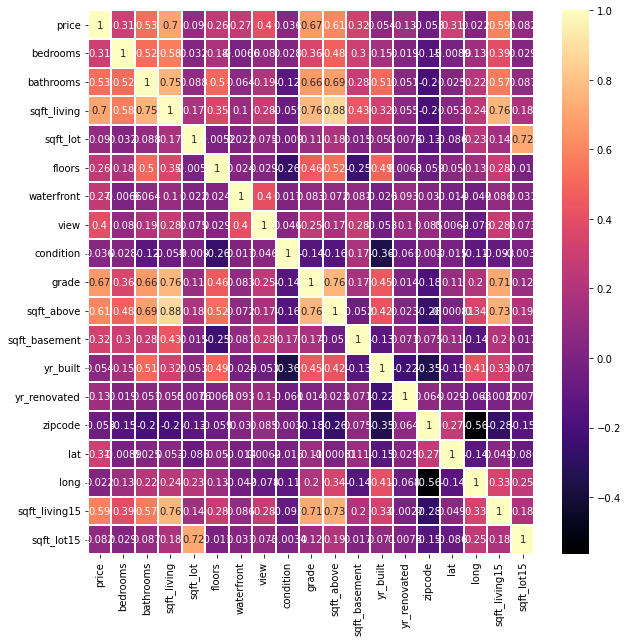

In [61]:
#Create the correlation matrix heat map with annotation
plt.subplots(figsize=(10,10))
sns.heatmap(newHousingDF.drop('id', axis=1).corr(), linewidths=.1, annot=True, cmap='magma');
plt.yticks(rotation=0);

The heatmap let us know that there's a strong positive correlation between 'price' and 'sqft_living'(0.70), 'grade'(0.67), and 'sqft_above'(0.61). 

There is also a strong correlation between 'grade' and 'sqft_above'(0.76) and 'grade' and 'sqft_living'(0.76), and 'sqft_grade' and 'sqft_living'(0.88).

'sqft_living' is the square footage of the entire house. 'sqft_above' is the square footage of the home minus the basement area. As the square footage of the house gets bigger, it is easy to see that "sqft_above" will also get larger.

## 3.3 Scatter Plots

In [66]:
# define useful function to create scatterplots of house prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 15)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'price', data=newHousingDF, alpha=0.5)
        ax.set(xlabel=col, ylabel='House price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [67]:
features = [x for x in newHousingDF.columns if x not in ['id', 'price']]
#'lat', 'long', 'sqft_lot15', 'sqft_living15'

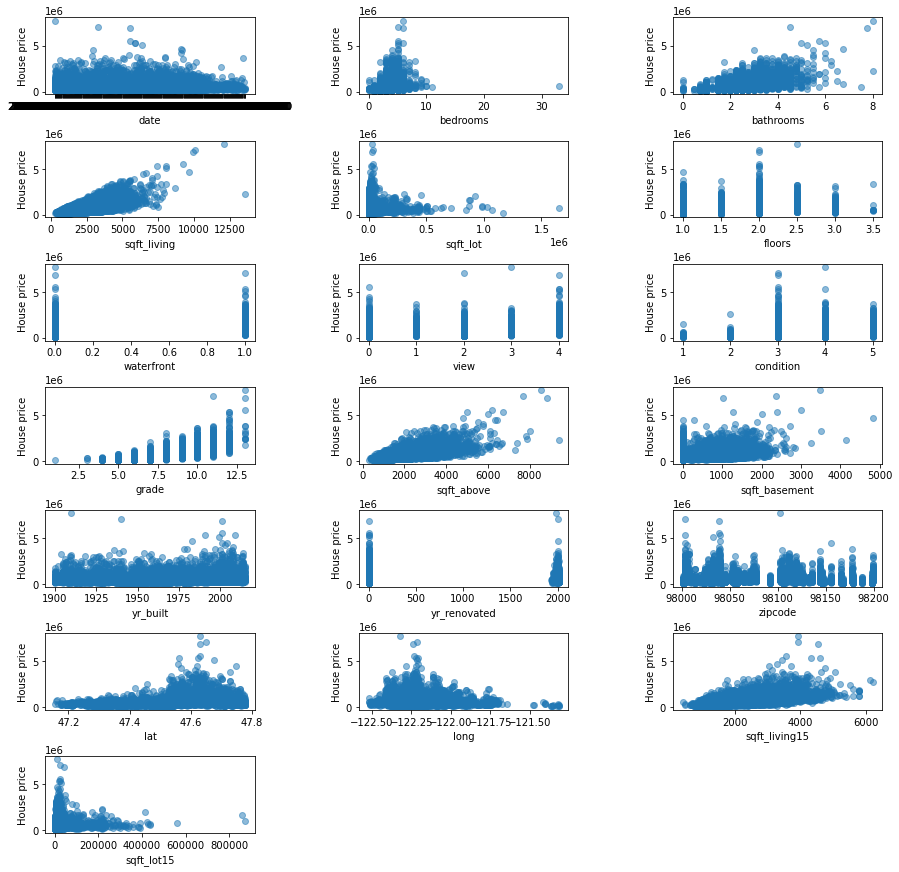

In [68]:
scatterplots(features, ncol=3, figsize=(15, 15))

Based on the scatter plots, we can see that 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', and 'zipcode' would be considered categorical variables.

## 3.4 Get Ranking Based on Zip Code Average House

### <b>House Price Percentage based on average zip code</b>

In [100]:
#percent ranking
df = newHousingDF.copy()

labels = ['Bottom 10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', 'Top 10%']
bins = [0, 0.0999, 0.1999, 0.2999, 0.3999, 0.4999, 0.5999, 0.6999, 0.7999, 0.8999, 1]

df['PercentRank'] = pd.qcut(
    df['price'],
    bins,
    labels = labels, 
    duplicates='drop')

df = df.sort_values(['zipcode', 'price'], ascending=False)
df

id             date      price  bedrooms  bathrooms  \
7907   1068000375  20140923T000000  3200000.0         6       5.00   
20535  1370800515  20141030T000000  2950000.0         4       4.25   
11620  1069000070  20150415T000000  2795000.0         5       3.25   
19323  5553300375  20140820T000000  2160000.0         3       3.50   
15152  1370800225  20150318T000000  2152500.0         4       3.25   
...           ...              ...        ...       ...        ...   
3402   3356403820  20141205T000000   115000.0         2       1.00   
12208  4031000520  20140708T000000   115000.0         1       2.00   
20962  1278000210  20150311T000000   110000.0         2       1.00   
1218   3751600030  20140717T000000   100000.0         2       1.00   
15456  8856000545  20140507T000000   100000.0         2       1.00   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
7907          7100     18200     2.5           0     0  ...      5240.0   
20535         4470      5884     2.0           0     1  ...      3230.0   
11620         4590     12793     2.0           0     2  ...      3590.0   
19323         3080      6495     2.0           0     3  ...      2530.0   
15152         3840      6214     1.5           0     3  ...      2590.0   
...            ...       ...     ...         ...   ...  ...         ...   
3402          1000     16524     1.0           0     0  ...      1000.0   
12208         1150      9812     1.0           0     0  ...      1150.0   
20962          828      4524     1.0           0     0  ...       828.0   
1218           770     17334     1.0           0     0  ...       770.0   
15456          910     22000     1.0           0     0  ...       910.0   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7907            1860      1933          2002    98199  47.6427 -122.408   
20535           1240      2010             0    98199  47.6387 -122.405   
11620           1000      1928             0    98199  47.6453 -122.410   
19323            550      1996          2006    98199  47.6321 -122.393   
15152           1250      1939             0    98199  47.6388 -122.406   
...              ...       ...           ...      ...      ...      ...   
3402               0      1913             0    98001  47.2841 -122.255   
12208              0      1962             0    98001  47.2951 -122.284   
20962              0      1968          2007    98001  47.2655 -122.244   
1218               0      1978             0    98001  47.2997 -122.269   
15456              0      1956             0    98001  47.2777 -122.252   

       sqft_living15  sqft_lot15  PercentRank  
7907            3130        6477      Top 10%  
20535           2570        6000      Top 10%  
11620           2920        8609      Top 10%  
19323           4120        8620      Top 10%  
15152           3280        5915      Top 10%  
...              ...         ...          ...  
3402            1350       10208   Bottom 10%  
12208           1200        9812   Bottom 10%  
20962            828        5402   Bottom 10%  
1218            1480       17334   Bottom 10%  
15456           1326        9891   Bottom 10%  

[21611 rows x 22 columns]

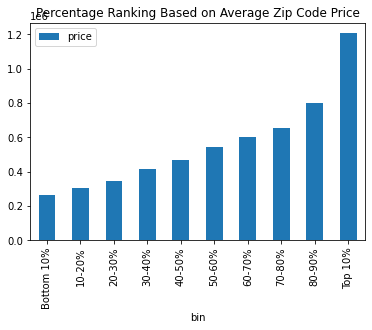

In [101]:
avgZip = df.groupby(['zipcode']).price.mean()

bins = [0, 0.0999, 0.1999, 0.2999, 0.3999, 0.4999, 0.5999, 0.6999, 0.7999, 0.8999, 1]
labels = ['Bottom 10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', 'Top 10%']

dfavgzip = pd.DataFrame(avgZip)
dfavgzip['bin']=pd.qcut(avgZip, bins, labels=labels,duplicates='drop')

dfavgzip.groupby('bin').mean().plot(kind='bar')


plt.title("Percentage Ranking Based on Average Zip Code Price")
plt.show()

### <b>Boxplot Based on All House Prices</b>

Now I am going to show boxplots based on their 'PercentRank' category

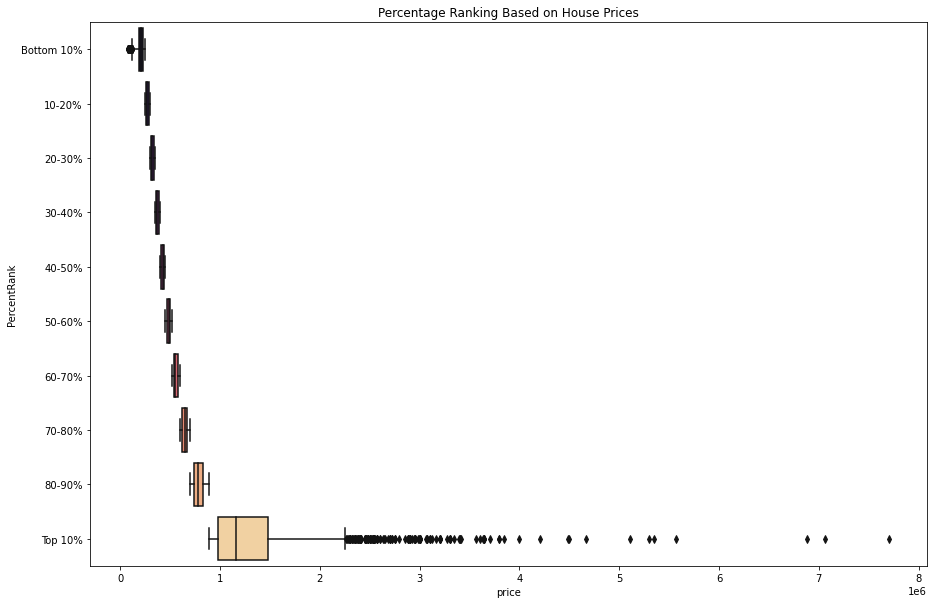

In [26]:
#create a box plot

figure, ax = plt.subplots(figsize=(15,10))
ax.set_title('Percentage Ranking Based on House Prices')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

ax = sns.boxplot(data=df, 
                 y='PercentRank', 
                 x='price', 
                 orient='h',
                 palette = 'magma')

It's difficult to see every single boxplot, so I am going to show the percent ranking with a barchart.

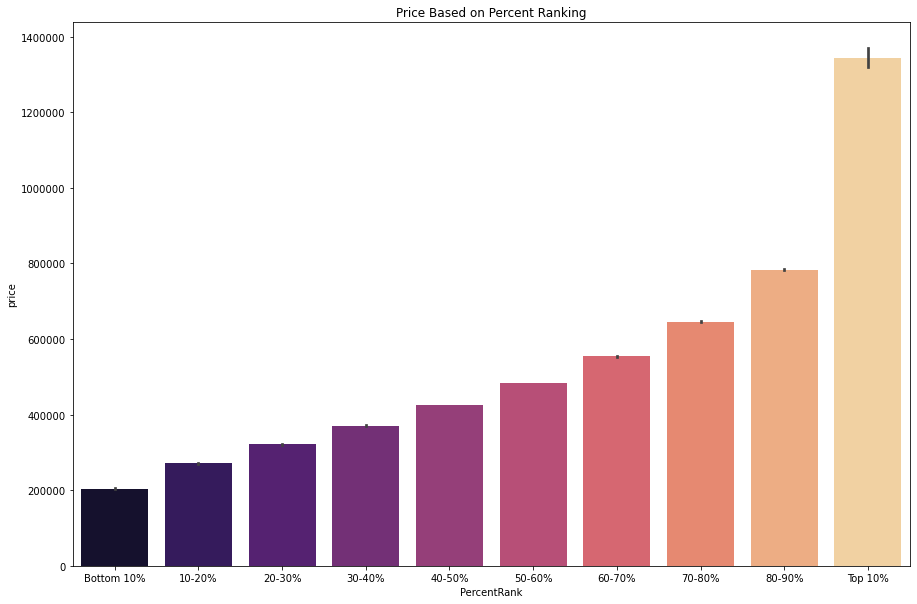

In [27]:
#create a barplot
#color palette: husl, plasma

figure, ax = plt.subplots(figsize=(15,10))
ax.set_title('Price Based on Percent Ranking')

ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

ax = sns.barplot(data=df, 
                 x='PercentRank', 
                 y='price', 
                 palette = 'magma')

### Get the range of the houses based on zipcode

In [28]:
#find range
minPrice = newHousingDF.groupby(['zipcode']).price.min()
maxPrice = newHousingDF.groupby(['zipcode']).price.max()

#get the range 
range_per_zip = maxPrice - minPrice

#Top highest rangest based on zip code
range_per_zip.sort_values(ascending=False).head()

zipcode
98102    7370000.0
98004    6637500.0
98039    6097500.0
98033    4980800.0
98040    4800000.0
Name: price, dtype: float64

## 3.5 View the Distribution of the Data <a class="anchor" id="DataDistribution"></a>

View some of the distribution based on the categorical features

### View distribution based on 'bedrooms'.

<Figure size 720x288 with 0 Axes>

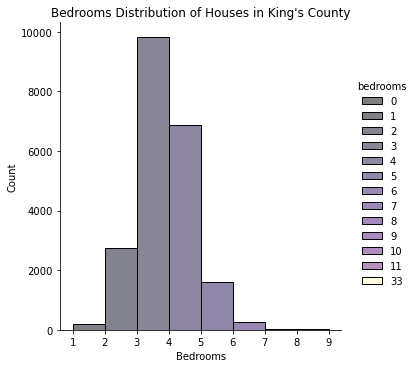

In [29]:
plt.figure(figsize=(10,4))

sns.displot(newHousingDF, x="bedrooms", bins=[1,2,3,4,5,6,7,8,9], hue='bedrooms', palette='magma').set(xlabel='Bedrooms', title="Bedrooms Distribution of Houses in King's County")

plt.show()

There is an outlier with 33 bedrooms which we might not need in the future.

### View distribution based on 'waterfront'.

<Figure size 720x288 with 0 Axes>

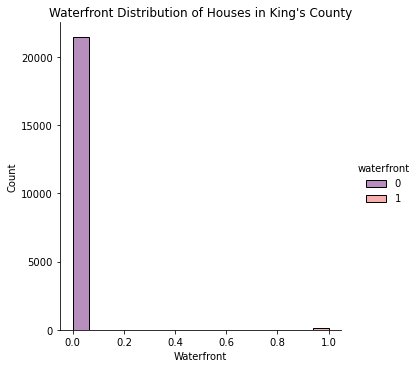

In [30]:
plt.figure(figsize=(10,4))

sns.displot(newHousingDF, x="waterfront", hue='waterfront', palette='magma').set(xlabel='Waterfront', title="Waterfront Distribution of Houses in King's County")

Most homes do not have a waterfront view.

### View distribution based on 'view'.

<Figure size 720x288 with 0 Axes>

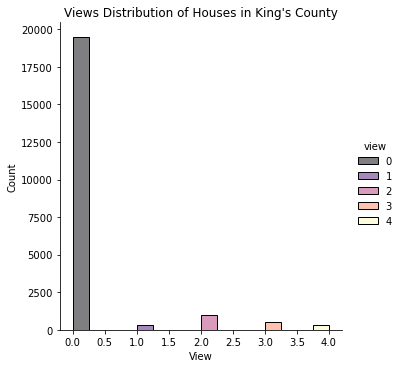

In [31]:
plt.figure(figsize=(10,4))

sns.displot(newHousingDF, x="view", hue='view', palette='magma').set(xlabel='View', title="Views Distribution of Houses in King's County")

### View distribution based on 'condition'.

<Figure size 720x288 with 0 Axes>

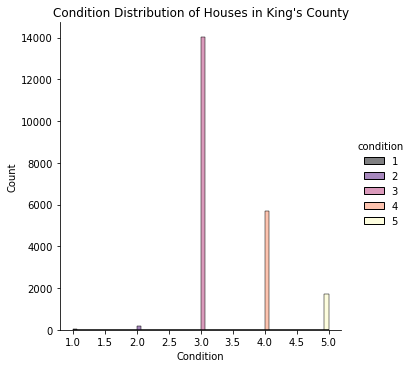

In [32]:
plt.figure(figsize=(10,4))

sns.displot(newHousingDF, x="condition",hue='condition', palette='magma').set(xlabel='Condition', title="Condition Distribution of Houses in King's County")

Most homes score a 3 on their house condition.

### View distribution based on 'grade'.

<Figure size 720x288 with 0 Axes>

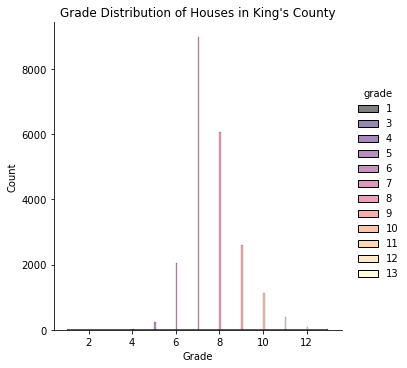

In [33]:
plt.figure(figsize=(10,4))

sns.displot(newHousingDF, x="grade",hue='grade', palette='magma').set(xlabel='Grade', title="Grade Distribution of Houses in King's County")

Most homes have a 7 for the grade of their homes.

## 3.5 Price vs features <a class="anchor" id="PriceVSFeatures"></a>

This section is to show the 'price' vs the other features in the dataset.

### Distribution of price

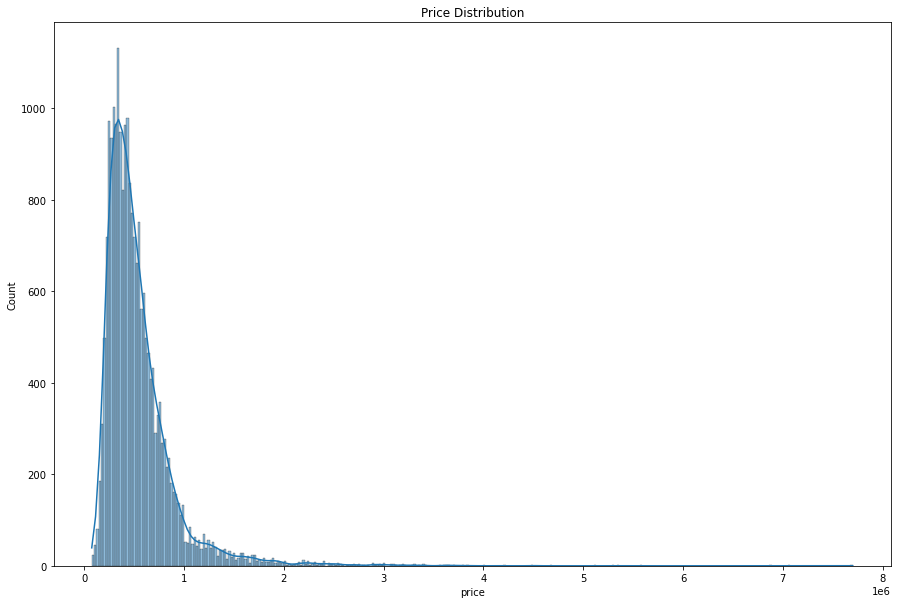

In [34]:
figure, ax = plt.subplots(figsize=(15,10))

ax = sns.histplot(x="price", data=newHousingDF, palette='magma', kde=True).set(title='Price Distribution')

#### Price vs Date

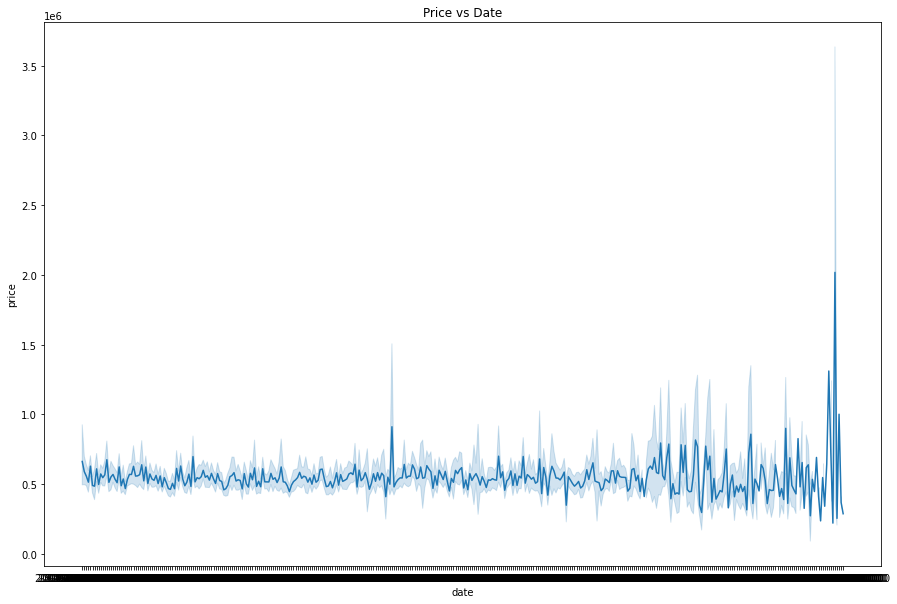

In [35]:
figure, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="date", y="price", data=newHousingDF,).set(title='Price vs Date')

#### Price vs bedrooms

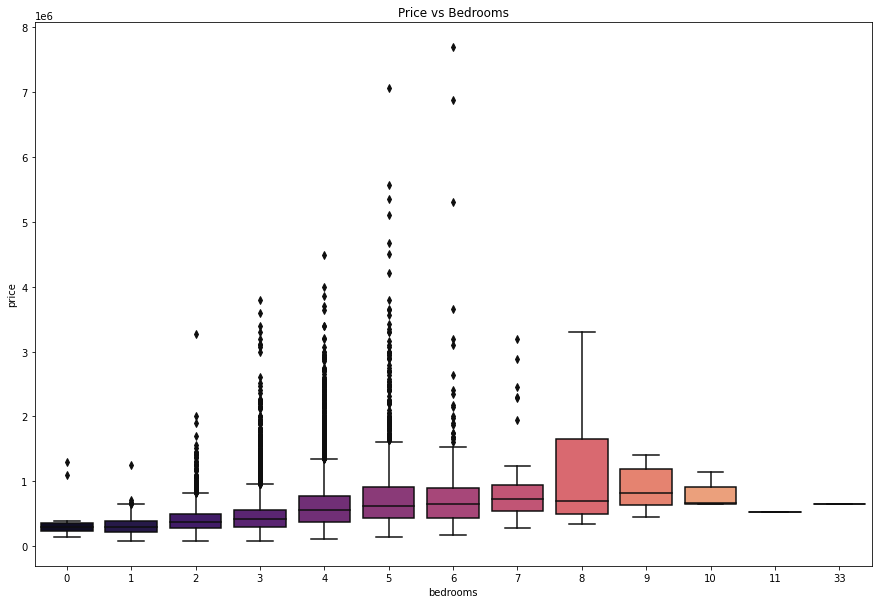

In [36]:
figure, ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(x="bedrooms", y="price",
                 data=newHousingDF, palette='magma').set(title='Price vs Bedrooms')

#### Let's bucket the bedrooms.

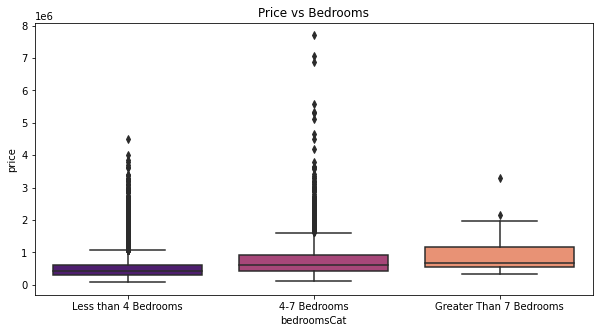

In [37]:
bedroomDF = newHousingDF.copy()

conditions = [
    (bedroomDF['bedrooms'] <= 4),
    (bedroomDF['bedrooms'] > 4) & (bedroomDF['bedrooms'] <= 7),
    (bedroomDF['bedrooms'] > 7)
    ]

values = ['Less than 4 Bedrooms', '4-7 Bedrooms', 'Greater Than 7 Bedrooms']


bedroomDF['bedroomsCat'] = np.select(conditions, values)

figure, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x="bedroomsCat", y="price",
                 data=bedroomDF, palette='magma').set(title='Price vs Bedrooms')

#### Price vs bathrooms

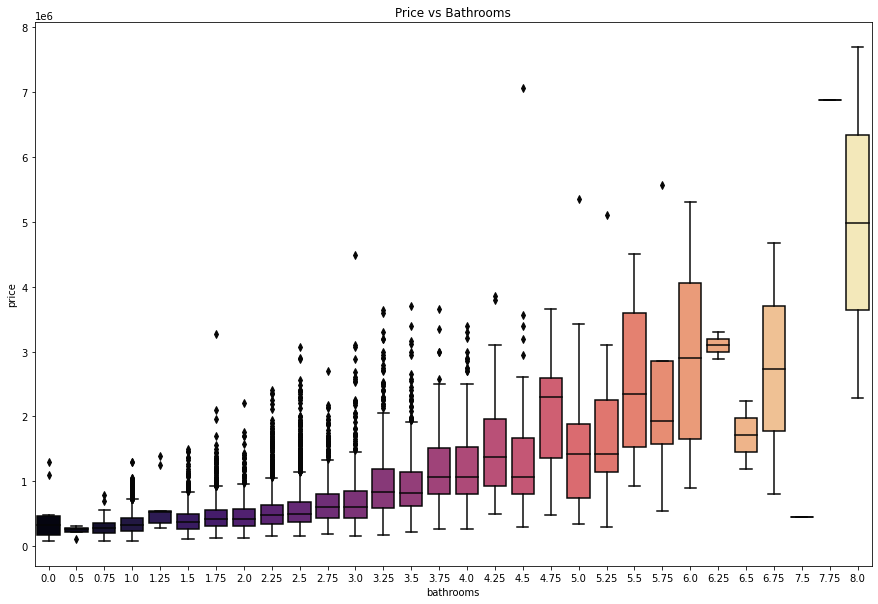

In [38]:
figure, ax = plt.subplots(figsize=(15,10))
ax = sns.boxplot(x="bathrooms", y="price",
                 data=newHousingDF, palette='magma').set(title='Price vs Bathrooms')

### Let's bucket the bathrooms.

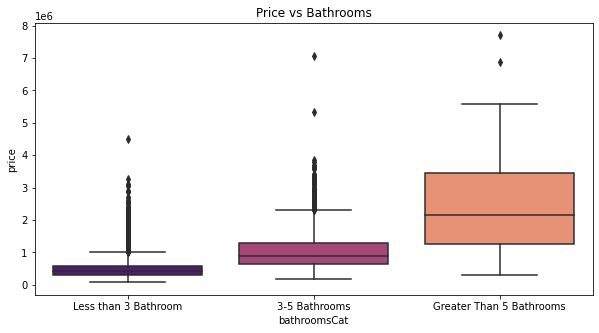

In [39]:
bathroomDF = newHousingDF.copy()


conditions = [
    (bathroomDF['bathrooms'] <= 3),
    (bathroomDF['bathrooms'] > 3) & (bathroomDF['bathrooms'] <= 5),
    (bathroomDF['bathrooms'] > 5)
    ]

values = ['Less than 3 Bathroom', '3-5 Bathrooms', 'Greater Than 5 Bathrooms']


bathroomDF['bathroomsCat'] = np.select(conditions, values)

figure, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x="bathroomsCat", y="price",
                 data=bathroomDF, palette='magma').set(title='Price vs Bathrooms')

#### Price vs sqft_living

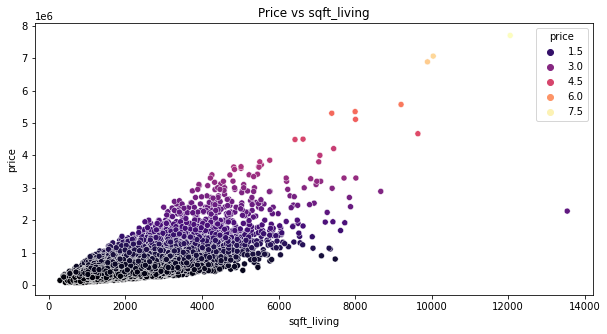

In [69]:
figure, ax = plt.subplots(figsize=(10,5))

ax = sns.scatterplot(x="sqft_living", y="price", hue="price",
                 data=newHousingDF, palette='magma').set(title='Price vs sqft_living')

#### Price vs sqft_lot 

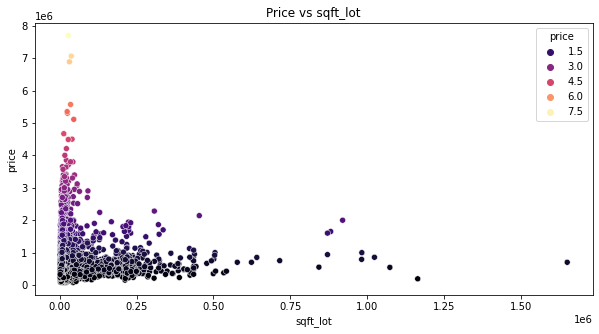

In [70]:
figure, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x="sqft_lot", y="price",hue="price",
                 data=newHousingDF, palette='magma').set(title='Price vs sqft_lot')

#### Price vs floors

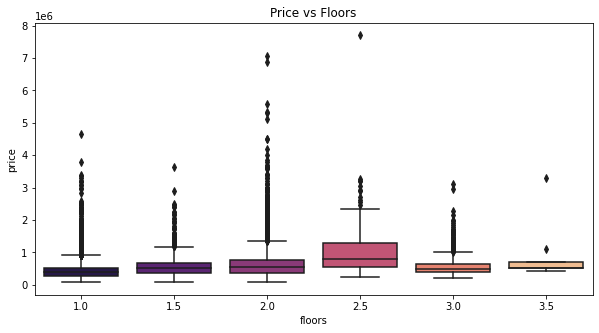

In [71]:
figure, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x="floors", y="price",
                 data=newHousingDF, palette='magma').set(title='Price vs Floors')

#### Price vs waterfront

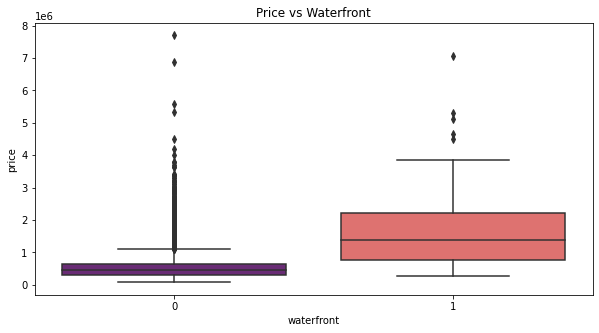

In [43]:
figure, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x="waterfront", y="price",
                 data=newHousingDF, palette='magma').set(title='Price vs Waterfront')

#### Price vs view

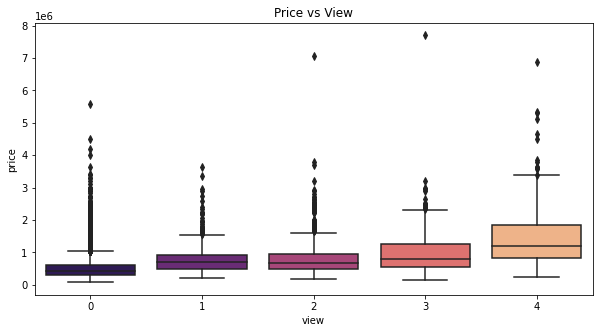

In [72]:
figure, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(x="view", y="price",
                 data=newHousingDF, palette='magma').set(title='Price vs View')

#### Price vs condition

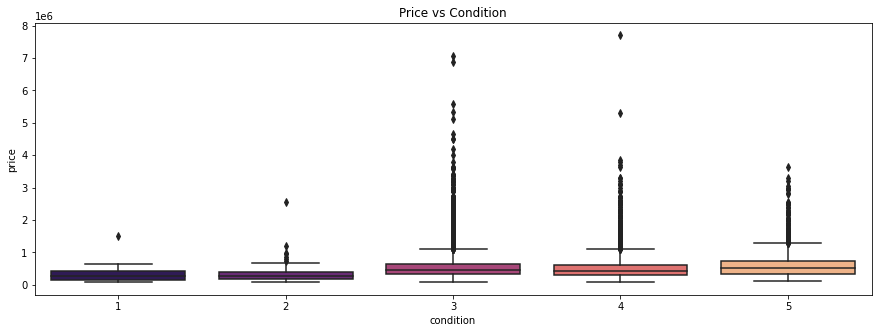

In [79]:
figure, ax = plt.subplots(figsize=(15,5))

ax = sns.boxplot(x="condition", y="price",
                 data=newHousingDF, palette='magma').set(title='Price vs Condition')

#### Price vs grade

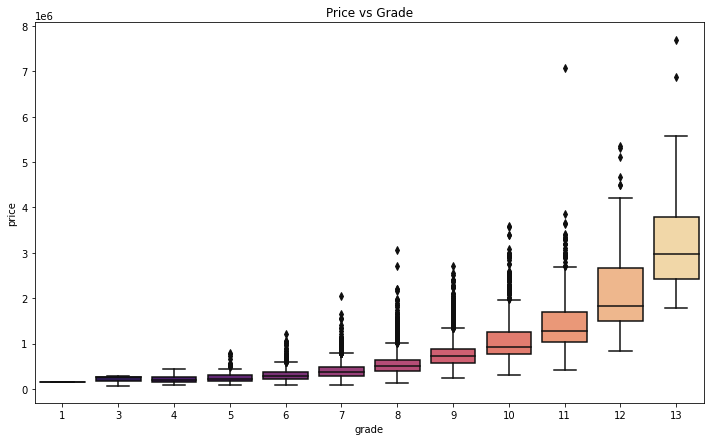

In [80]:
figure, ax = plt.subplots(figsize=(12,7))

ax = sns.boxplot(x="grade", y="price",
                 data=newHousingDF, palette='magma').set(title='Price vs Grade')

#### Price vs sqft_above 

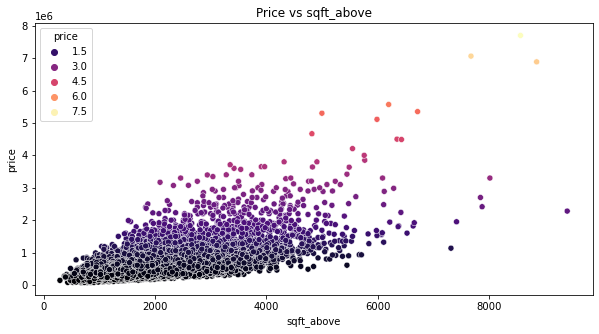

In [81]:
figure, ax = plt.subplots(figsize=(10,5))

ax = sns.scatterplot(x="sqft_above", y="price", hue='price',
                 data=newHousingDF, palette='magma').set(title='Price vs sqft_above')

#### Price vs sqft_basement

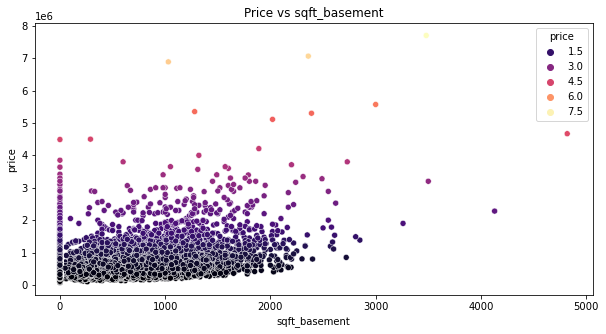

In [82]:
figure, ax = plt.subplots(figsize=(10,5))

ax = sns.scatterplot(x="sqft_basement", y="price", hue='price',
                 data=newHousingDF, palette='magma').set(title='Price vs sqft_basement')

#### Price vs yr_built

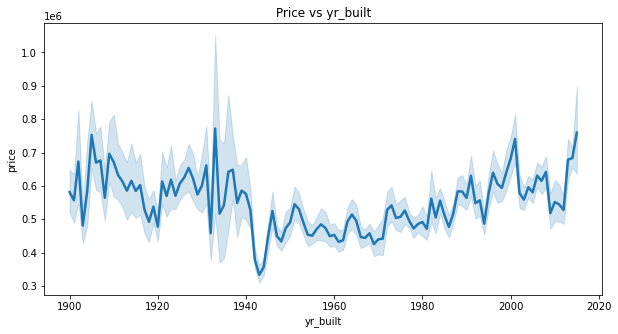

In [83]:
figure, ax = plt.subplots(figsize=(10,5))

ax = sns.lineplot(x="yr_built", y="price", linewidth=2.5,
                 data=newHousingDF).set(title='Price vs yr_built')

#### Price vs yr_renovated

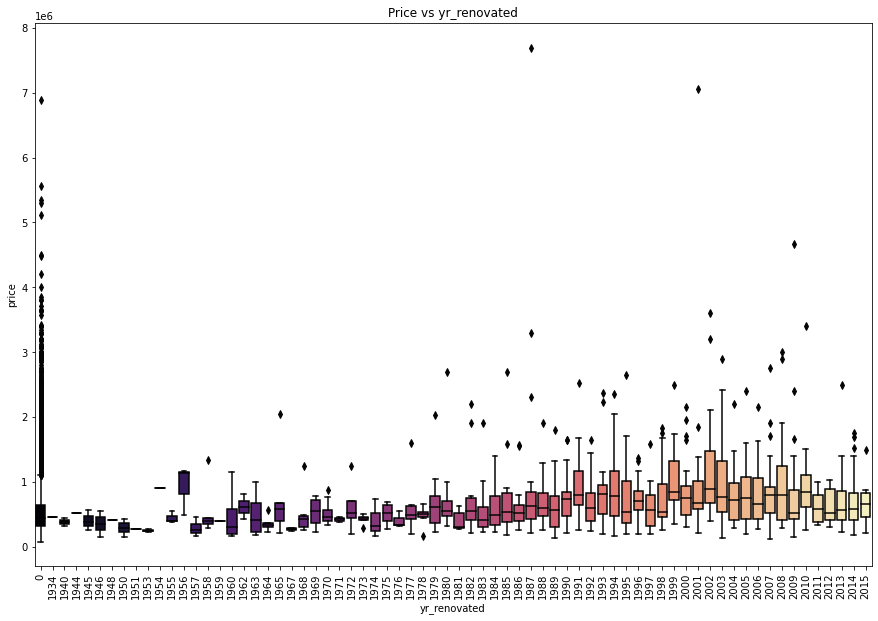

In [85]:
figure, ax = plt.subplots(figsize=(15,10))

ax = sns.boxplot(x="yr_renovated", y="price",
                 data=newHousingDF, palette='magma').set(title='Price vs yr_renovated')
plt.xticks(rotation=90);

<b>Let's look at the barplot of this.</b>

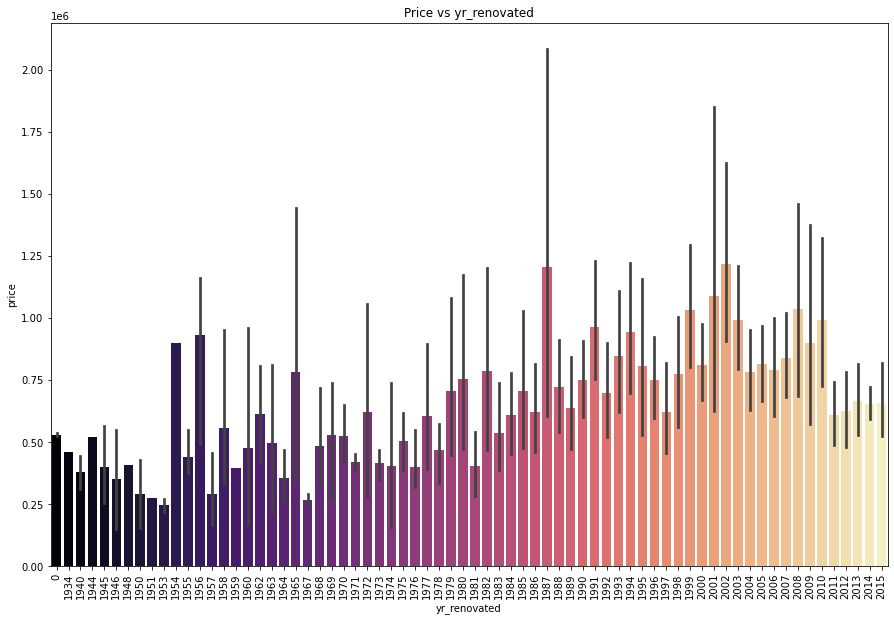

In [51]:
figure, ax = plt.subplots(figsize=(15,10))

ax = sns.barplot(x="yr_renovated", y="price",
                 data=newHousingDF, palette='magma').set(title='Price vs yr_renovated')
plt.xticks(rotation=90);

#### Price vs zipcode

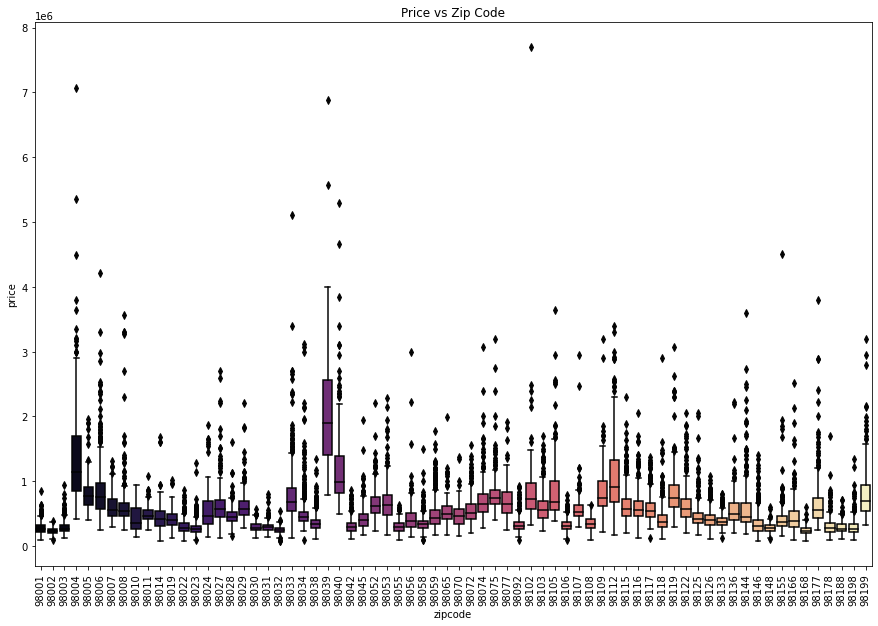

In [52]:
figure, ax = plt.subplots(figsize=(15,10))

ax = sns.boxplot(x="zipcode", y="price",
                 data=newHousingDF, palette='magma').set(title='Price vs Zip Code')
plt.xticks(rotation=90);

<b>Let's look at the barplot of this.</b>

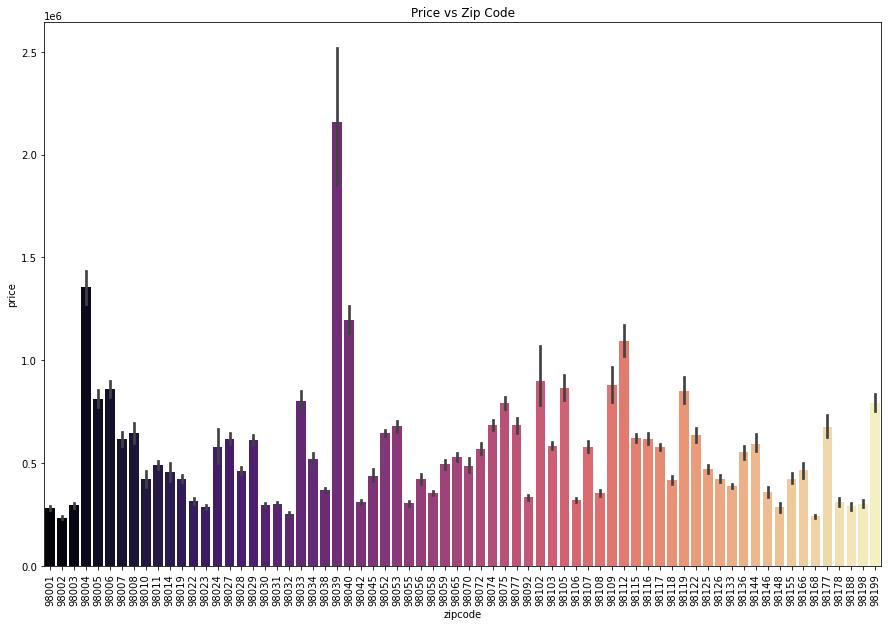

In [87]:
figure, ax = plt.subplots(figsize=(15,10))

ax = sns.barplot(x="zipcode", y="price",
                 data=newHousingDF, palette='magma').set(title='Price vs Zip Code')
plt.xticks(rotation=90);

#### Price vs lat

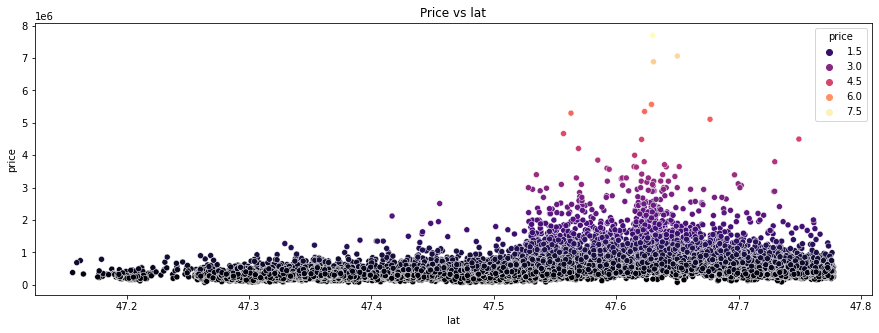

In [96]:
figure, ax = plt.subplots(figsize=(15,5))

ax = sns.scatterplot(x="lat", y="price", hue='price',
                 data=newHousingDF, palette='magma').set(title='Price vs lat')

#### Price vs long

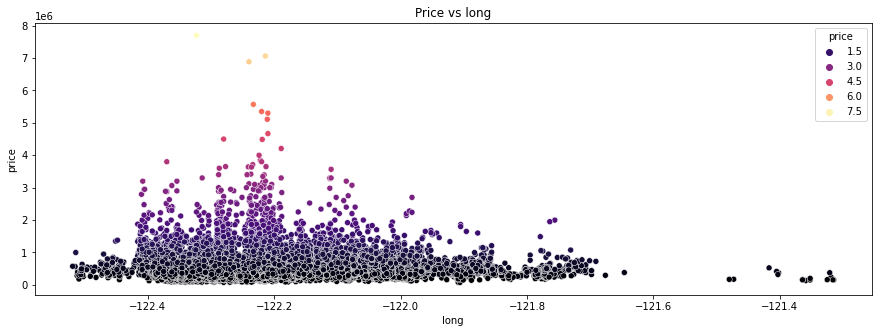

In [59]:
figure, ax = plt.subplots(figsize=(15,5)) 

ax = sns.scatterplot(x="long", y="price", hue='price',
                 data=newHousingDF, palette='magma').set(title='Price vs long')

#### Price vs sqft_living15

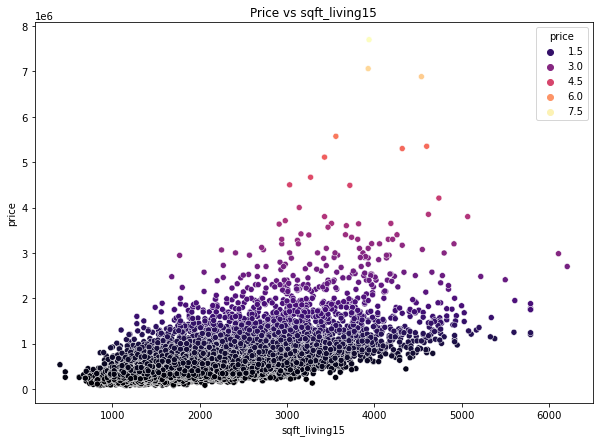

In [98]:
figure, ax = plt.subplots(figsize=(10,7))

ax = sns.scatterplot(x="sqft_living15", y="price",hue="price",
                 data=newHousingDF, palette='magma').set(title='Price vs sqft_living15')

#### Price vs sqft_lot15

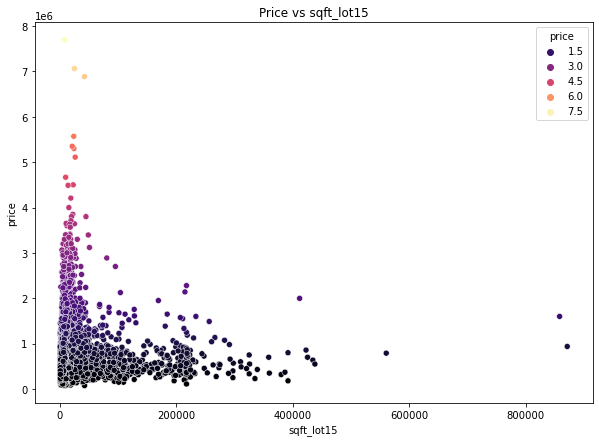

In [99]:
figure, ax = plt.subplots(figsize=(10,7))

ax = sns.scatterplot(x="sqft_lot15", y="price", hue='price',
                 data=newHousingDF, palette='magma').set(title='Price vs sqft_lot15')

## Let's view the top house prices.

In [91]:
topPrice = newHousingDF.sort_values("price", ascending=False).head()
topPrice

id             date      price  bedrooms  bathrooms  \
7252  6762700020  20141013T000000  7700000.0         6       8.00   
3914  9808700762  20140611T000000  7062500.0         5       4.50   
9254  9208900037  20140919T000000  6885000.0         6       7.75   
4411  2470100110  20140804T000000  5570000.0         5       5.75   
1448  8907500070  20150413T000000  5350000.0         5       5.00   

      sqft_living  sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7252        12050     27600     2.5           0     3  ...     13      8570.0   
3914        10040     37325     2.0           1     2  ...     11      7680.0   
9254         9890     31374     2.0           0     4  ...     13      8860.0   
4411         9200     35069     2.0           0     0  ...     13      6200.0   
1448         8000     23985     2.0           0     4  ...     12      6720.0   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7252           3480      1910          1987    98102  47.6298 -122.323   
3914           2360      1940          2001    98004  47.6500 -122.214   
9254           1030      2001             0    98039  47.6305 -122.240   
4411           3000      2001             0    98039  47.6289 -122.233   
1448           1280      2009             0    98004  47.6232 -122.220   

      sqft_living15  sqft_lot15  
7252           3940        8800  
3914           3930       25449  
9254           4540       42730  
4411           3560       24345  
1448           4600       21750  

[5 rows x 21 columns]

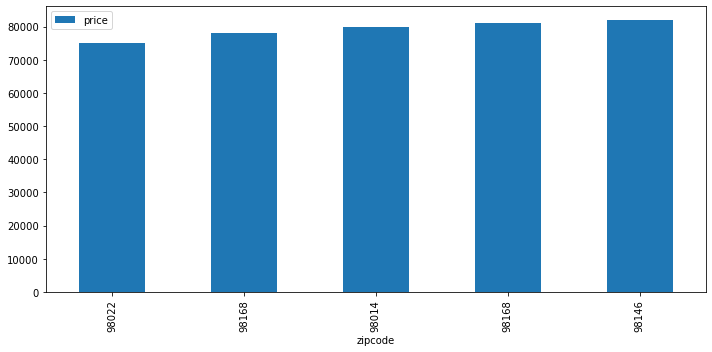

In [92]:
#Plot Top House Prices
newHousingDF.sort_values("price", ascending=True).head().plot(kind='bar', x="zipcode", 
                                                                y="price", figsize=(10,5))
plt.tight_layout()
plt.show()

## Let's view the Bottom house prices.

In [93]:
bottomPrice = newHousingDF.sort_values("price", ascending=True).head(5)
bottomPrice

id             date    price  bedrooms  bathrooms  sqft_living  \
1149   3421079032  20150217T000000  75000.0         1       0.00          670   
15293    40000362  20140506T000000  78000.0         2       1.00          780   
465    8658300340  20140523T000000  80000.0         1       0.75          430   
16198  3028200080  20150324T000000  81000.0         2       1.00          730   
8274   3883800011  20141105T000000  82000.0         3       1.00          860   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1149      43377     1.0           0     0  ...      3       670.0   
15293     16344     1.0           0     0  ...      5       780.0   
465        5050     1.0           0     0  ...      4       430.0   
16198      9975     1.0           0     0  ...      5       730.0   
8274      10426     1.0           0     0  ...      6       860.0   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1149               0      1966             0    98022  47.2638 -121.906   
15293              0      1942             0    98168  47.4739 -122.280   
465                0      1912             0    98014  47.6499 -121.909   
16198              0      1943             0    98168  47.4808 -122.315   
8274               0      1954             0    98146  47.4987 -122.341   

       sqft_living15  sqft_lot15  
1149            1160       42882  
15293           1700       10387  
465             1200        7500  
16198            860        9000  
8274            1140       11250  

[5 rows x 21 columns]

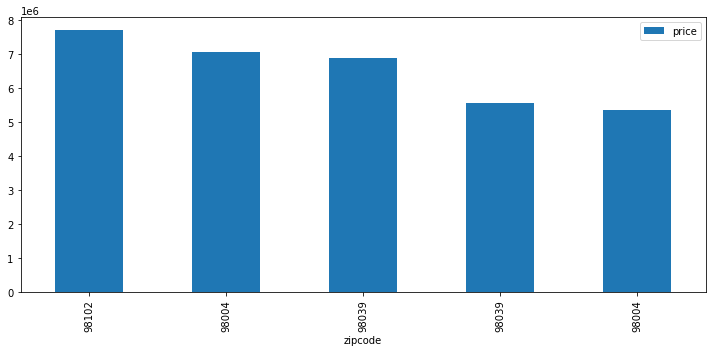

In [95]:
#Plot Bottom House Prices

newHousingDF.sort_values("price", ascending=False).head(5).plot(kind='bar', x="zipcode", 
                                                                 y="price", figsize=(10,5))
plt.tight_layout()
plt.show()

# Summary 

Based on the scatter plots, we can see that 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', and 'zipcode' would be considered categorical variables.

Based on the heatmap, here's a strong positive correlation between 'price' and 'sqft_living', 'grade', and 'sqft_above'. There is also a strong correlation between 'grade' and 'sqft_above' and 'sqft_living' and 'sqft_above' which makes them multicollinear.

These features will affect our house price.